In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
from sklearn import datasets
# import california housing data from sklearn and store data into a variable
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [3]:
calihouses.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
calihouses.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
calihouses.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
calihouses.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [7]:
df=pd.DataFrame(data=calidata,columns=calihouses.feature_names)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df['target']=calihouses.target

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.shape

(20640, 9)

In [12]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [13]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189955B0B48>,
      dtype=object)

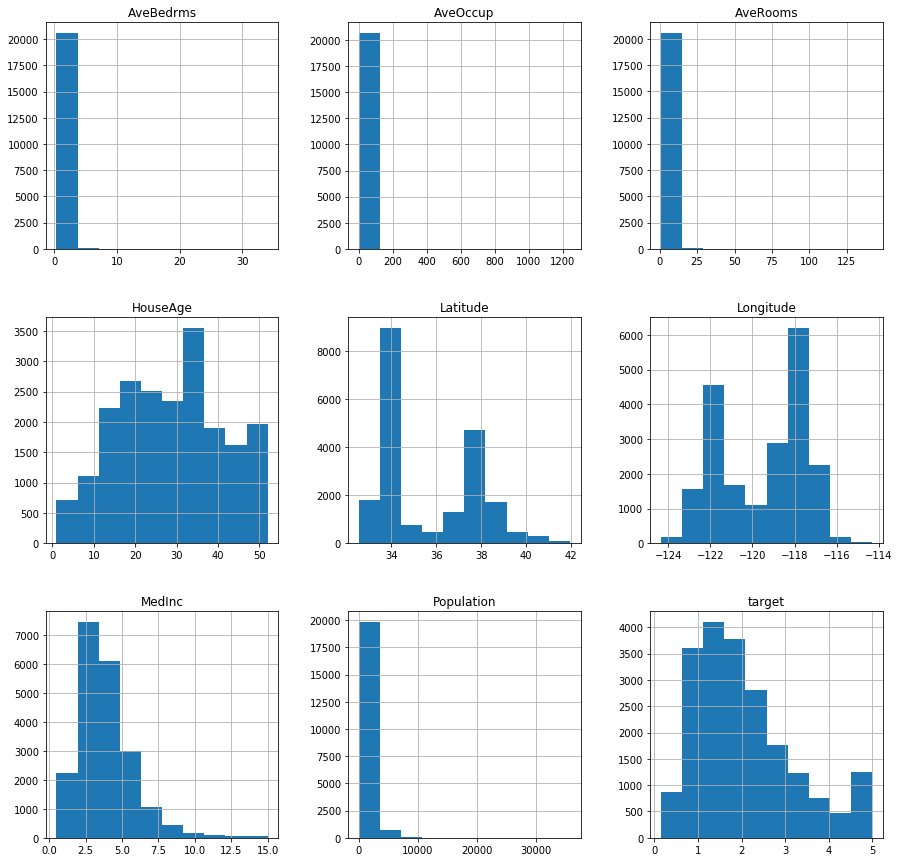

In [14]:
df.hist(figsize=(15,15),grid=True,layout=(3,3))

In [15]:
df.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
target         0.977763
dtype: float64

MedInc           AxesSubplot(0.125,0.657941;0.227941x0.222059)
HouseAge      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
AveRooms      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
AveBedrms        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Population    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
AveOccup      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Latitude            AxesSubplot(0.125,0.125;0.227941x0.222059)
Longitude        AxesSubplot(0.398529,0.125;0.227941x0.222059)
target           AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

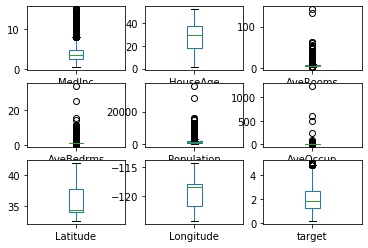

In [16]:
df.plot(kind='box',subplots=True,layout=(3,3))

In [17]:
from scipy.stats import boxcox
df['AveOccup']=boxcox(df['AveOccup'],0)
df['AveRooms']=boxcox(df['AveRooms'],0)
df['AveBedrms']=boxcox(df['AveBedrms'],0)
df['Population']=boxcox(df['Population'],0)


In [18]:
df.skew()

MedInc        1.646657
HouseAge      0.060331
AveRooms      0.868061
AveBedrms     6.406004
Population   -1.070786
AveOccup      2.127599
Latitude      0.465953
Longitude    -0.297801
target        0.977763
dtype: float64

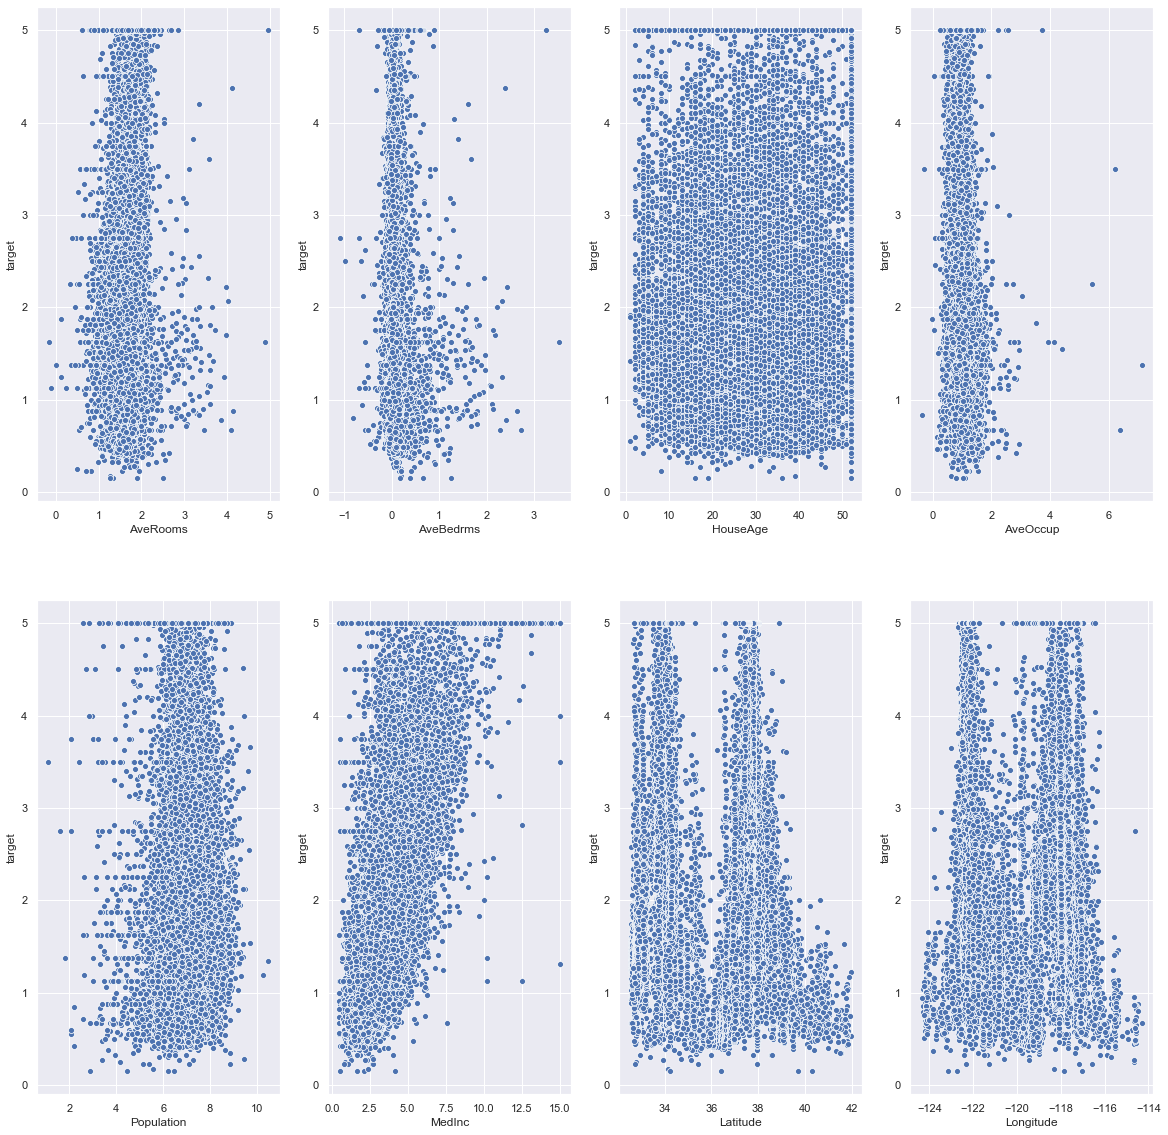

In [19]:
sns.set(font_scale=1.0)
fig,axes=plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(20,20)
sns.set_style('dark')
sns.scatterplot(x='AveRooms',y='target',data=df,ax=axes[0][0])
sns.scatterplot(x='AveBedrms',y='target',data=df,ax=axes[0][1])
sns.scatterplot(x='HouseAge',y='target',data=df,ax=axes[0][2])
sns.scatterplot(x='AveOccup',y='target',data=df,ax=axes[0][3])
sns.scatterplot(x='Population',y='target',data=df,ax=axes[1][0])
sns.scatterplot(x='MedInc',y='target',data=df,ax=axes[1][1])
sns.scatterplot(x='Latitude',y='target',data=df,ax=axes[1][2])
sns.scatterplot(x='Longitude',y='target',data=df,ax=axes[1][3])
plt.show()

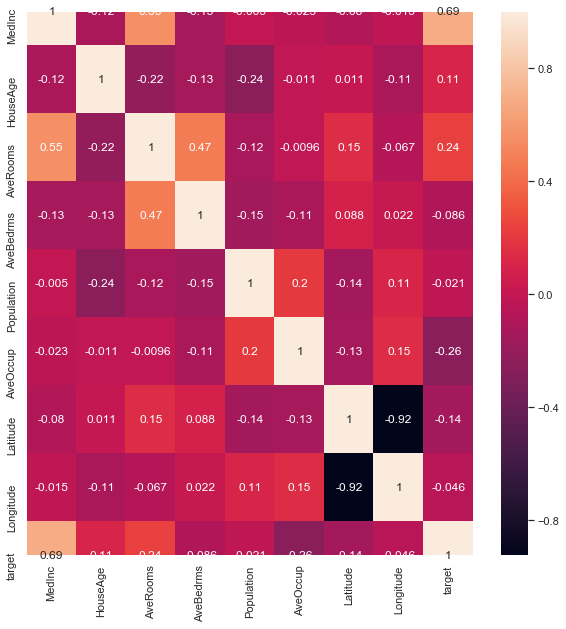

In [20]:
#Correlation between the attributes
hmap=df.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(hmap,annot=True)

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [22]:
#Removing the outliers
df=df[(z<3).all(axis=1)]

In [23]:
df.shape

(19603, 9)

In [24]:
df.cov()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,2.560453,-3.061861,0.235253,-0.030692,0.018253,-0.020117,-0.284674,-0.039024,1.179542
HouseAge,-3.061861,155.706788,-0.596773,-0.135791,-2.370824,-0.064968,0.343638,-2.586692,1.538720
AveRooms,0.235253,-0.596773,0.050115,0.002697,-0.009288,0.001180,0.068151,-0.042714,0.064256
AveBedrms,-0.030692,-0.135791,0.002697,0.007665,-0.001132,-0.002763,0.012323,-0.000902,-0.007630
Population,0.018253,-2.370824,-0.009288,-0.001132,0.393130,0.033215,-0.181779,0.158547,-0.018748
AveOccup,-0.020117,-0.064968,0.001180,-0.002763,0.033215,0.059503,-0.080194,0.085986,-0.083928
Latitude,-0.284674,0.343638,0.068151,0.012323,-0.181779,-0.080194,4.547744,-3.961896,-0.340587
Longitude,-0.039024,-2.586692,-0.042714,-0.000902,0.158547,0.085986,-3.961896,3.993712,-0.099172
target,1.179542,1.538720,0.064256,-0.007630,-0.018748,-0.083928,-0.340587,-0.099172,1.219049


In [25]:
y=df.iloc[:,8:9]
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [26]:
x=df.drop(['target'],axis=1)
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,1.943640,0.023530,5.774552,0.938270,37.88,-122.23
1,8.3014,21.0,1.830682,-0.028522,7.783641,0.746613,37.86,-122.22
2,7.2574,52.0,2.114825,0.070874,6.206576,1.030426,37.85,-122.24
3,5.6431,52.0,1.760845,0.070514,6.324359,0.935287,37.85,-122.25
4,3.8462,52.0,1.837665,0.077962,6.336826,0.779998,37.85,-122.25


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=35)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13134, 8)
(6469, 8)
(13134, 1)
(6469, 1)


In [28]:
lr=LinearRegression()
lr.fit(x_train,y_train)
score=lr.score(x_train,y_train)
pred=lr.predict(x_test)
print("Predictions:",pred)
print("Score:",score)


Predictions: [[2.62148174]
 [3.0245538 ]
 [3.03214645]
 ...
 [2.26167494]
 [2.25133329]
 [2.55483096]]
Score: 0.6744444729138264


In [31]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,pred))
print(-1*metrics.mean_squared_error(y_test,pred))

df =print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

0.3924385913243025
-0.3924385913243025
0.6264491929313202


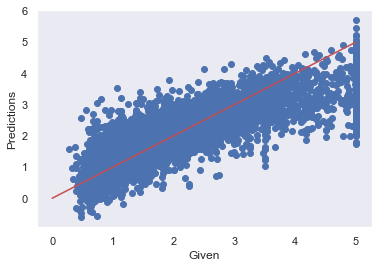

In [32]:
plot=plt.scatter(y_test,pred)
plt.xlabel('Given')
plt.ylabel('Predictions')
x_plot=np.linspace(0,5,100)
y_plot=x_plot
plt.plot(x_plot,y_plot,color='r')


In [33]:
#using K-Fold Validation
from sklearn.model_selection import cross_val_predict
k_predictions=cross_val_predict(lr,x,y,cv=10)
print(k_predictions)

[[4.52147443]
 [4.56384608]
 [4.00799441]
 ...
 [0.21840747]
 [0.50541132]
 [0.55194826]]


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
kfold_score=cross_val_score(lr,x,y,cv=10,scoring='neg_mean_squared_error')
print(kfold_score.mean())

-0.41862184582576195


In [35]:
#using LOO Validation
LOO_predictions=cross_val_predict(lr,x,y,cv=len(x))
LOO_predictions

array([[4.4152874 ],
       [4.48765203],
       [3.88351706],
       ...,
       [0.27646544],
       [0.55786557],
       [0.59927507]])

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
LOO_score=cross_val_score(lr,x,y,cv=len(x),scoring='neg_mean_squared_error')
print(LOO_score.mean())

-0.3953057680476328


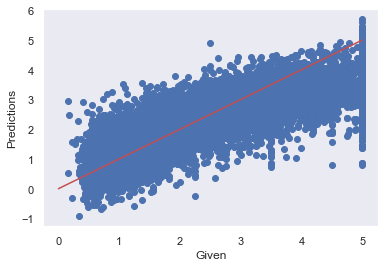

In [37]:
#plotting te graph
plot=plt.scatter(y,LOO_predictions)
plt.xlabel('Given')
plt.ylabel('Predictions')
x_plot=np.linspace(0,5,100)
y_plot=x_plot
plt.plot(x_plot,y_plot,color='r')